In [1]:
import cv2
import hashlib
from PIL import Image


# Load Image

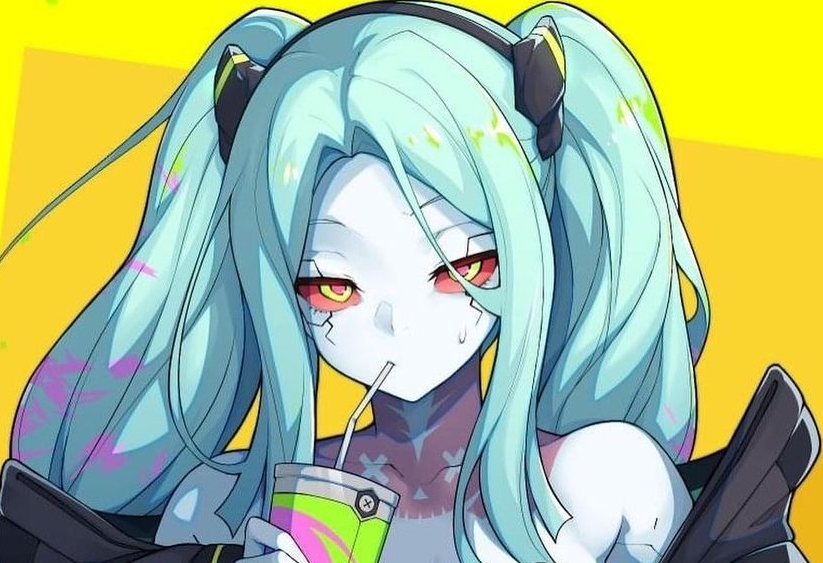

In [2]:
im_path = "C:/Users/Abdullah/OneDrive/Desktop/task images/test/rebecca.jpg"
image = cv2.imread(im_path)
pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

display(pil_image)

# Split Image into Parts

In [ ]:
#This is the code to print the picture in small window one by one in parts


# import cv2
# import numpy as np


# def split_image_into_parts(image, cols=3, rows=2):
#     height, width, _ = image.shape
#     part_height = height // rows
#     part_width = width // cols
    
#     parts = np.array_split(image, rows, axis=0)
#     parts = [np.array_split(part, cols, axis=1) for part in parts]
#     parts = [part for sublist in parts for part in sublist]
    
#     return parts


# # Assuming you have already loaded the image into the 'image' variable

# im_parts = split_image_into_parts(image, cols=3, rows=2)

# # Display the image parts
# for part in im_parts:
#     cv2.imshow('Image Part', part)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

In [ ]:
# def split_image_into_parts(image, cols=3, rows=2):
#     # your code here


# im_parts = split_image_into_parts(image, cols=3, rows=2)

# # display parts
# # your code here

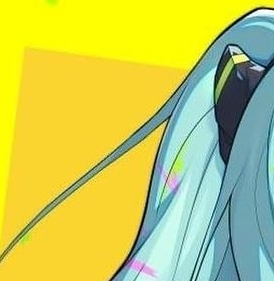

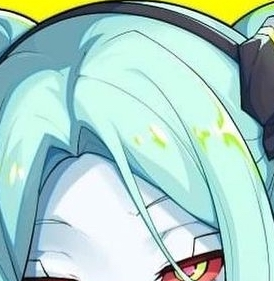

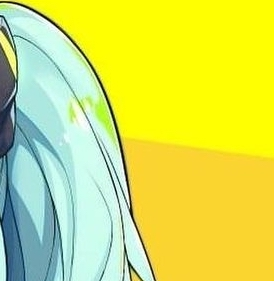

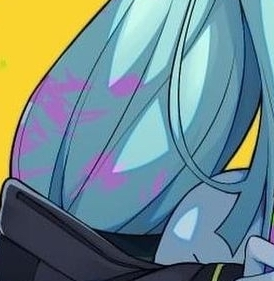

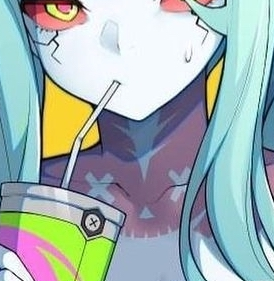

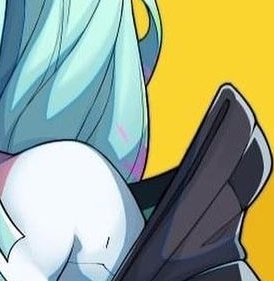

In [3]:
import cv2
import numpy as np
from PIL import Image


def split_image_into_parts(image, cols=3, rows=2):
    height, width, _ = image.shape
    part_height = height // rows
    part_width = width // cols
    
    parts = []
    
    for row in range(rows):
        for col in range(cols):
            y = row * part_height
            x = col * part_width
            part = image[y:y+part_height, x:x+part_width]
            parts.append(part)
    
    return parts


# Assuming you have already loaded the image into the 'image' variable

im_parts = split_image_into_parts(image, cols=3, rows=2)

# Display the image parts
for part in im_parts:
    pil_image = Image.fromarray(cv2.cvtColor(part, cv2.COLOR_BGR2RGB))
    display(pil_image)

# Joining Back of Parts

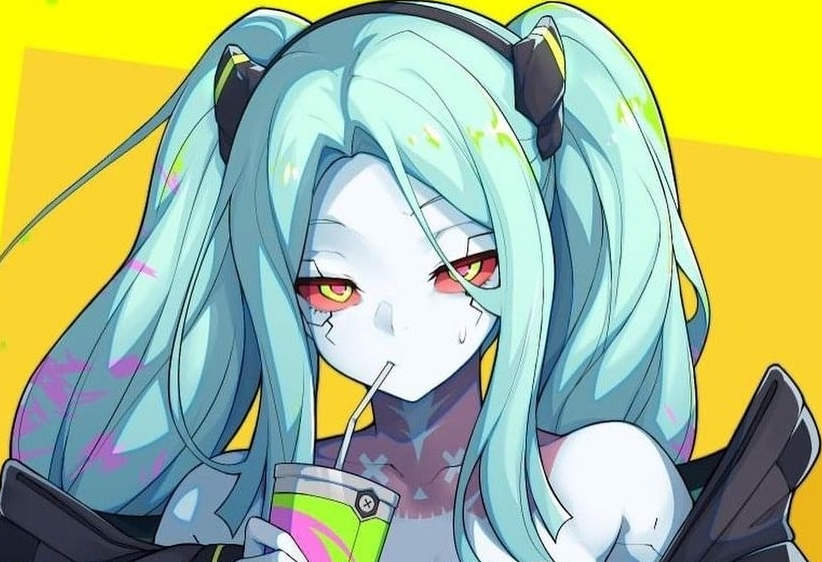

In [4]:
def join_image_parts(image_parts, cols=3, rows=2):
    part_height, part_width, _ = image_parts[0].shape
    height = part_height * rows
    width = part_width * cols
    
    joined_image = np.zeros((height, width, 3), dtype=np.uint8)
    
    for idx, part in enumerate(image_parts):
        row = idx // cols
        col = idx % cols
        y_start = row * part_height
        y_end = y_start + part_height
        x_start = col * part_width
        x_end = x_start + part_width
        joined_image[y_start:y_end, x_start:x_end] = part
    
    return joined_image

# Assuming you have already loaded the image into the 'image' variable
im_parts = split_image_into_parts(image, cols=3, rows=2)

# Join the image parts back together
joined_image = join_image_parts(im_parts, cols=3, rows=2)

# Display the joined image
pil_image = Image.fromarray(cv2.cvtColor(joined_image, cv2.COLOR_BGR2RGB))
display(pil_image)


# Save joined Image


In [5]:
joined_image_path = "C://Users//Abdullah//OneDrive//Desktop//task images//test//joined_image.jpg"
cv2.imwrite(joined_image_path, joined_image)

True

# Compare Original and Saved Image Hashes (should be same)

In [6]:
def get_hash(file_path):

    return hashlib.md5(cv2.imread(file_path).tobytes()).hexdigest()

# Compare Hashes

print("Hash of original Image:",get_hash("C:/Users/Abdullah/OneDrive/Desktop/task images/test/rebecca.jpg"))

print("Hash of New Image:",get_hash("C:/Users/Abdullah/OneDrive/Desktop/task images/test/joined_image.jpg"))

Hash of original Image: bf75c3e868ea5c763df58a56938c6a53
Hash of New Image: fb446d49d5d018f77833578a7e2dced7
